# Task 3

Generate statistical descriptions, comparisons, and time-series decomposition of all the meter readings.\
-- This exercise is to show your skills in data and statistical analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# file_path = '/content/drive/My Drive/cons_data_all_res.xlsx'
# data = pd.read_excel(file_path, parse_dates=['Time'])

In [3]:
# alternate way to load the dataset, make sure to keep the .xlsx file in the same directory as the notebook

file_path2 = 'cons_data_all_res.xlsx'
data = pd.read_excel(file_path2)

In [4]:
data

,Time,year,moy_date,doy_date,busday,season,dow_date,hour,month_name,temp,...,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12
0,2017-01-01 00:00:00,2017,1,1,False,Winter,1,0,January,22.0,...,0.0821,0.0667,0.2131,0.0854,0.1277,0.2173,0.1478,0.1568,1.1462,0.2553
1,2017-01-01 01:00:00,2017,1,1,False,Winter,1,1,January,22.0,...,0.0989,0.1047,0.1719,0.0948,0.1112,0.2411,0.1597,0.4315,0.2193,0.5326
2,2017-01-01 02:00:00,2017,1,1,False,Winter,1,2,January,22.0,...,0.0990,0.1001,0.1865,0.0978,0.1850,0.8316,0.2118,1.4843,0.1563,0.3818
3,2017-01-01 03:00:00,2017,1,1,False,Winter,1,3,January,23.5,...,0.1038,0.1354,0.1882,0.1064,0.0970,0.6645,0.2361,1.3716,0.2327,0.3798
4,2017-01-01 04:00:00,2017,1,1,False,Winter,1,4,January,27.0,...,0.0780,0.3508,0.2092,0.2456,0.1374,1.9451,0.3902,0.2105,0.2395,0.5176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2017-12-31 19:00:00,2017,12,365,False,Winter,1,19,December,23.5,...,0.0447,0.0896,0.1475,0.0889,0.1258,0.1211,0.1620,0.1375,0.5079,0.1471
8756,2017-12-31 20:00:00,2017,12,365,False,Winter,1,20,December,24.0,...,0.0223,0.0584,0.1649,0.0883,0.1166,0.1056,0.1639,0.1367,0.1133,0.1921
8757,2017-12-31 21:00:00,2017,12,365,False,Winter,1,21,December,23.0,...,0.0521,0.1000,0.1887,0.0977,0.0997,0.1052,0.1642,0.1791,0.1159,0.1581
8758,2017-12-31 22:00:00,2017,12,365,False,Winter,1,22,December,22.0,...,0.0485,0.1067,0.1874,0.0950,0.1459,0.1232,0.1654,0.1425,0.4760,0.2320


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        8760 non-null   datetime64[ns]
 1   year        8760 non-null   int64         
 2   moy_date    8760 non-null   int64         
 3   doy_date    8760 non-null   int64         
 4   busday      8760 non-null   bool          
 5   season      8760 non-null   object        
 6   dow_date    8760 non-null   int64         
 7   hour        8760 non-null   int64         
 8   month_name  8760 non-null   object        
 9   temp        8760 non-null   float64       
 10  humid       8760 non-null   float64       
 11  r1          8760 non-null   float64       
 12  r2          8760 non-null   float64       
 13  r3          8760 non-null   float64       
 14  r4          8760 non-null   float64       
 15  r5          8760 non-null   float64       
 16  r6          8760 non-nul

In [6]:
data.describe()

,Time,year,moy_date,doy_date,dow_date,hour,temp,humid,r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12
count,8760,8760.0,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2017-07-02 11:30:00,2017.0,6.526027,183.000000,3.991781,11.500000,28.658419,66.912808,0.224942,0.228293,0.239121,0.270619,0.316176,0.335506,0.363074,0.447705,0.456057,0.456416,0.597176,0.646039
min,2017-01-01 00:00:00,2017.0,1.000000,1.000000,1.000000,0.000000,17.500000,14.160000,0.010500,0.004400,0.010800,0.006500,0.014500,0.058100,0.027100,0.010300,0.012800,0.010400,0.019800,0.008600
25%,2017-04-02 05:45:00,2017.0,4.000000,92.000000,2.000000,5.750000,27.000000,53.690000,0.147300,0.139575,0.127000,0.154600,0.219700,0.150000,0.162975,0.251600,0.209600,0.173900,0.240100,0.234275
50%,2017-07-02 11:30:00,2017.0,7.000000,183.000000,4.000000,11.500000,29.000000,70.870000,0.176850,0.183500,0.182600,0.214800,0.278900,0.251900,0.248900,0.351700,0.331300,0.329200,0.382350,0.399100
75%,2017-10-01 17:15:00,2017.0,10.000000,274.000000,6.000000,17.250000,30.500000,81.405000,0.257800,0.248600,0.255300,0.306300,0.357250,0.377000,0.427500,0.520750,0.545650,0.555900,0.773850,0.859475
max,2017-12-31 23:00:00,2017.0,12.000000,365.000000,7.000000,23.000000,39.000000,100.000000,1.919100,2.630000,2.451000,5.491000,2.342100,2.875700,4.361700,3.754800,3.334700,3.063100,4.451100,3.725500
std,NaN,0.0,3.448048,105.372043,2.003519,6.922582,2.851937,18.325252,0.139805,0.196766,0.213277,0.202959,0.165605,0.295094,0.338699,0.319266,0.400453,0.406009,0.550780,0.604414


### Statistical descriptions of the meter readings

In [7]:
meter_readings = data.loc[:, 'r1':'r12']

# generating basic statistical descriptions for the energy meter readings
stats = meter_readings.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
r1,8760.0,0.224942,0.139805,0.0105,0.147300,0.17685,0.257800,1.9191
r2,8760.0,0.228293,0.196766,0.0044,0.139575,0.18350,0.248600,2.6300
r3,8760.0,0.239121,0.213277,0.0108,0.127000,0.18260,0.255300,2.4510
r4,8760.0,0.270619,0.202959,0.0065,0.154600,0.21480,0.306300,5.4910
r5,8760.0,0.316176,0.165605,0.0145,0.219700,0.27890,0.357250,2.3421
r6,8760.0,0.335506,0.295094,0.0581,0.150000,0.25190,0.377000,2.8757
r7,8760.0,0.363074,0.338699,0.0271,0.162975,0.24890,0.427500,4.3617
r8,8760.0,0.447705,0.319266,0.0103,0.251600,0.35170,0.520750,3.7548
r9,8760.0,0.456057,0.400453,0.0128,0.209600,0.33130,0.545650,3.3347
r10,8760.0,0.456416,0.406009,0.0104,0.173900,0.32920,0.555900,3.0631


### Comparisons

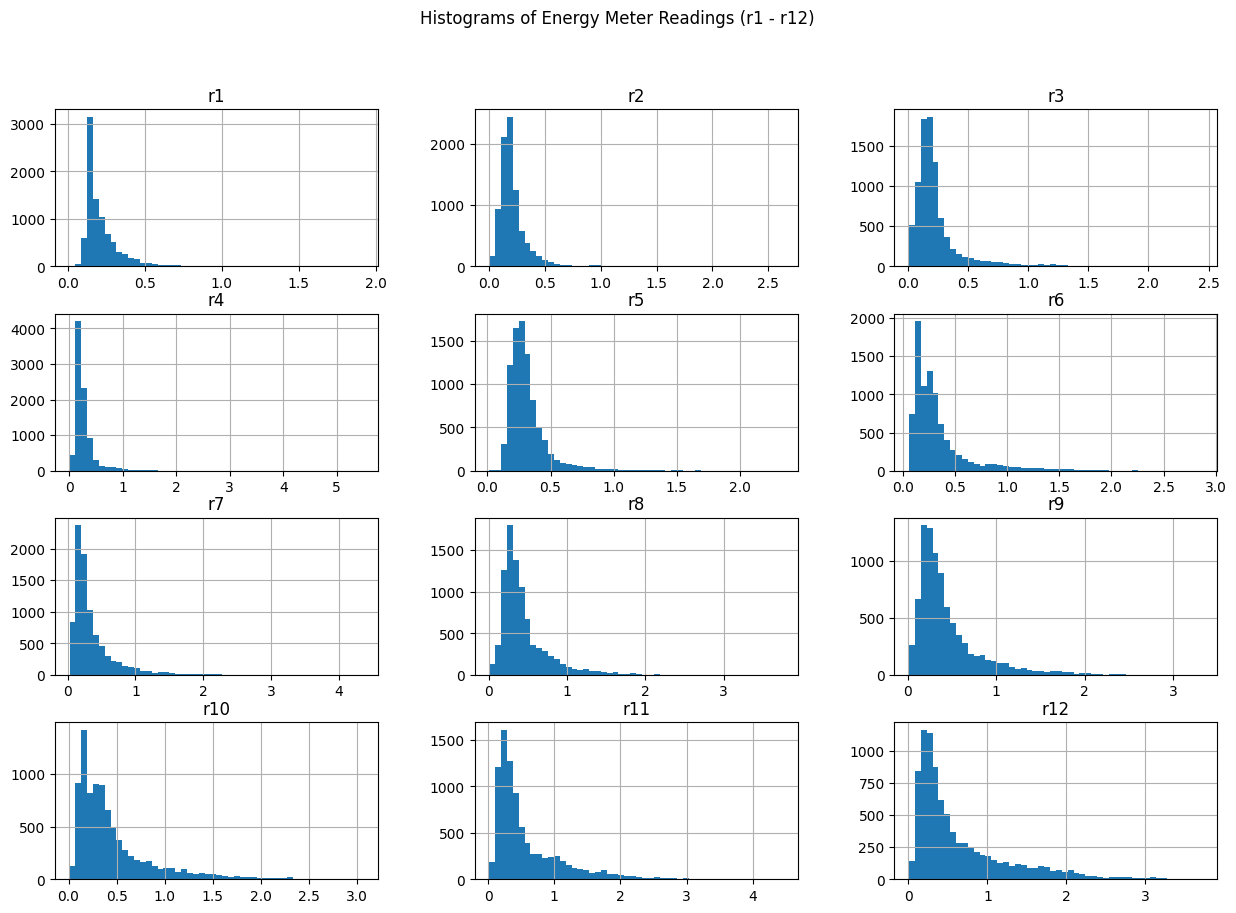

In [8]:
# Plotting histograms for each meter reading
meter_readings.hist(figsize=(15, 10), bins=50, layout=(4, 3))
plt.suptitle('Histograms of Energy Meter Readings (r1 - r12)')
plt.show()

Most of the histograms are skewed towards the right, indicating that there are a few high readings, but the majority of readings are low to moderate.

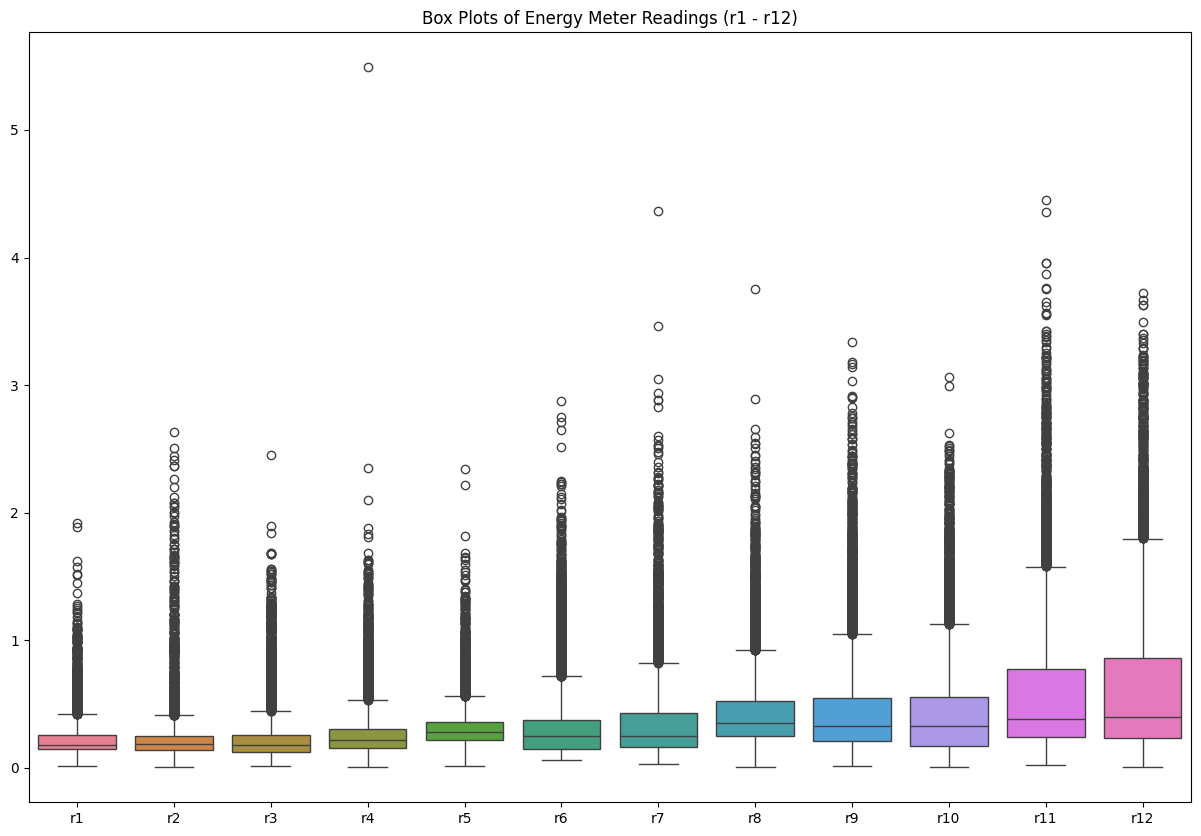

In [9]:
# Plotting box plots for each meter reading
plt.figure(figsize=(15, 10))
sns.boxplot(data=meter_readings)
plt.title('Box Plots of Energy Meter Readings (r1 - r12)')
plt.xticks()
plt.show()

The median values (central lines in the boxes) vary significantly between meters, with r12 having the highest median and r1 the lowest. This observation can also be noted from the description table. This difference could indicate variations in energy usage patterns or capacities of the devices measured by these meters.\
The interquartile range (box length) varies across meters, which could mean differences in the variability of readings. For instance, r11 and r12 have larger boxes, suggesting greater variability in readings.\
There are a lot of outliers shown by all the meters which could be due to measurement errors.

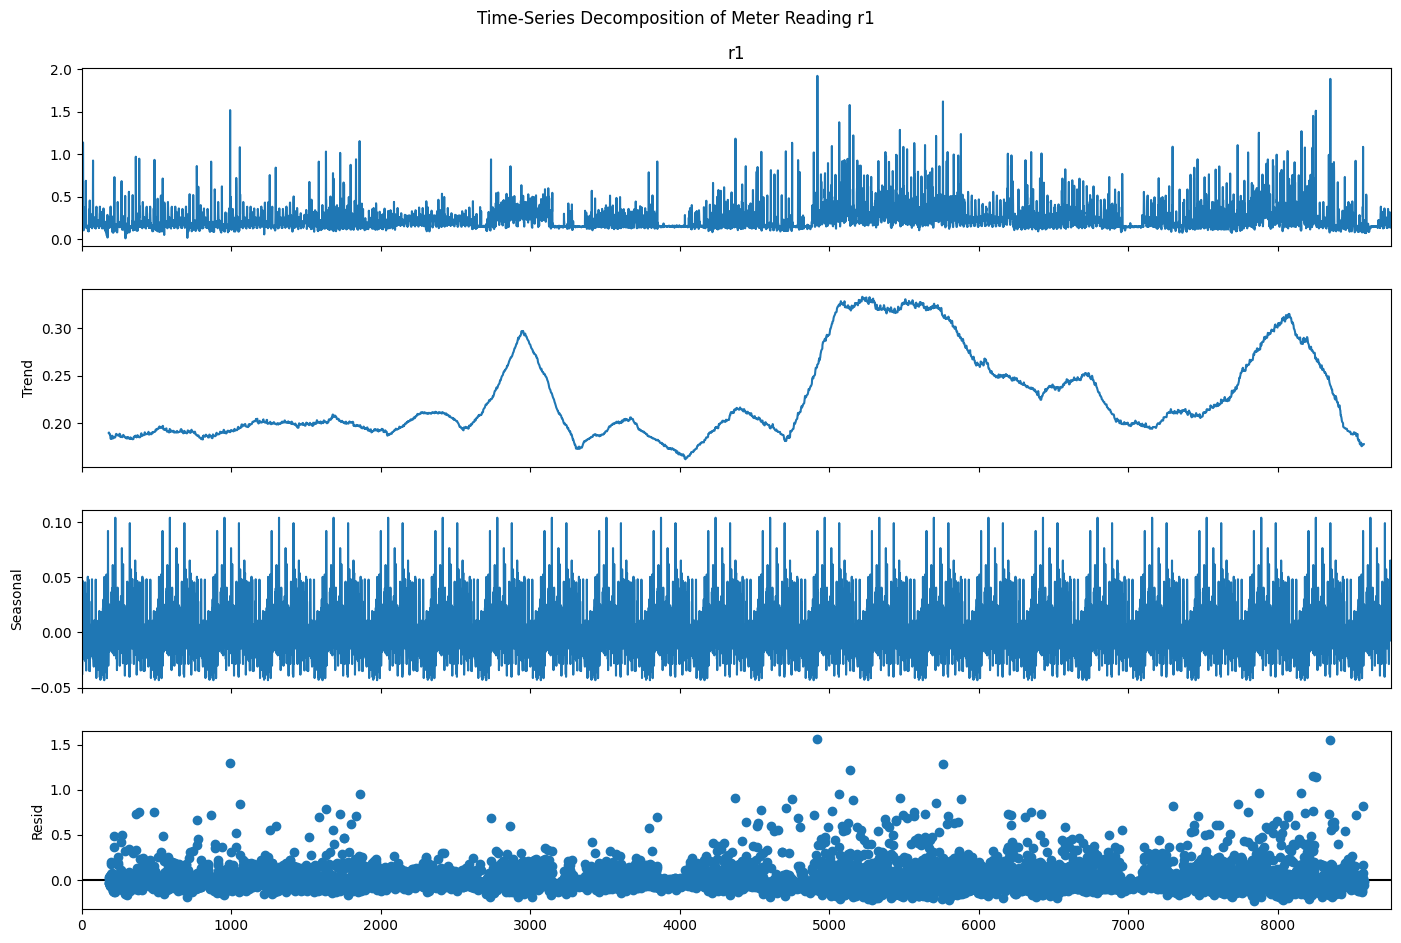

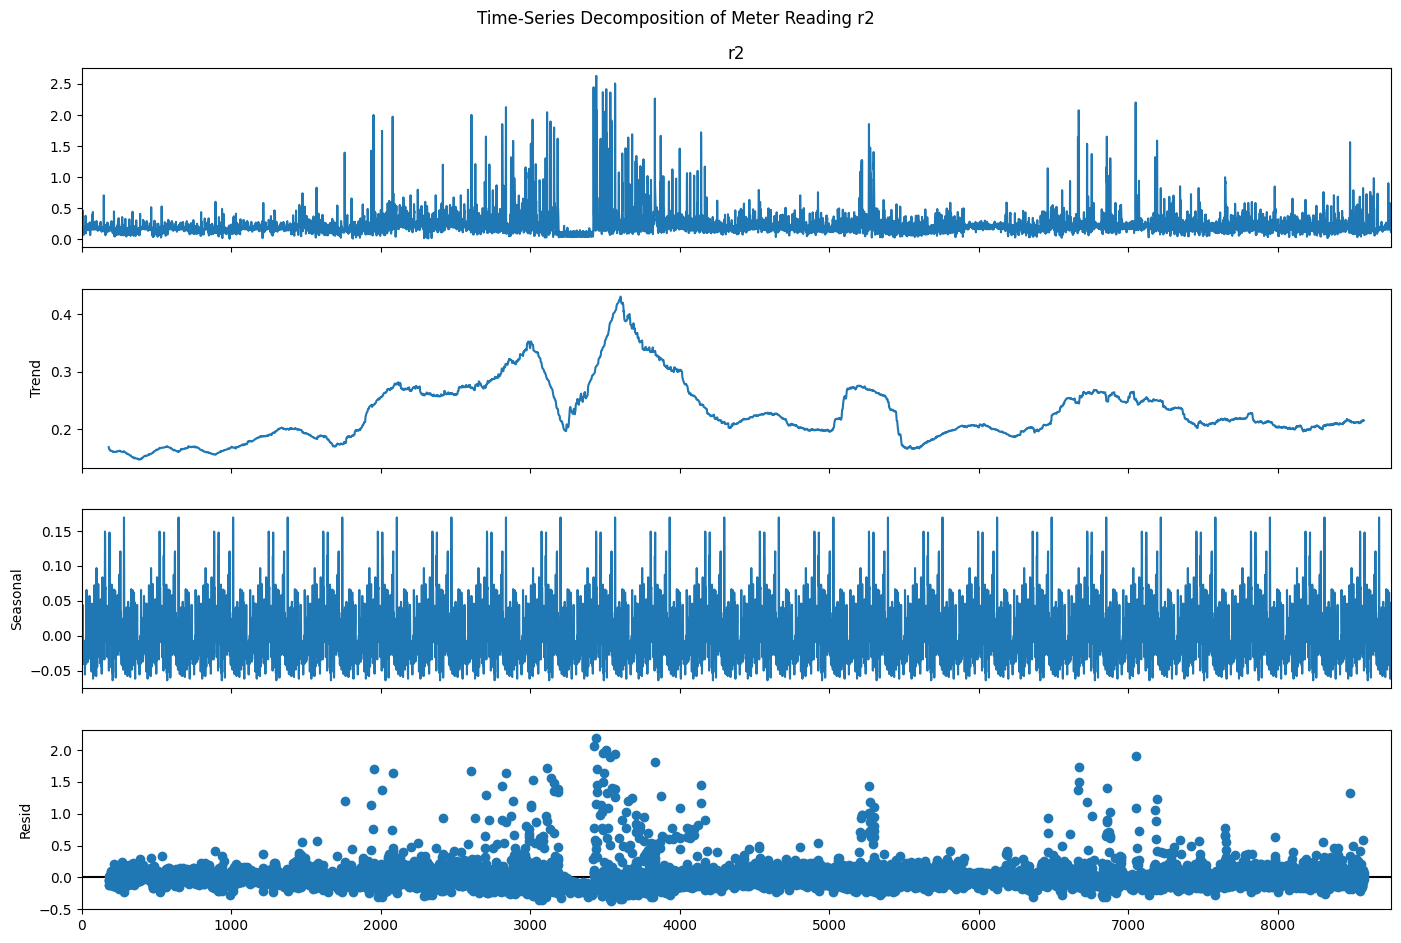

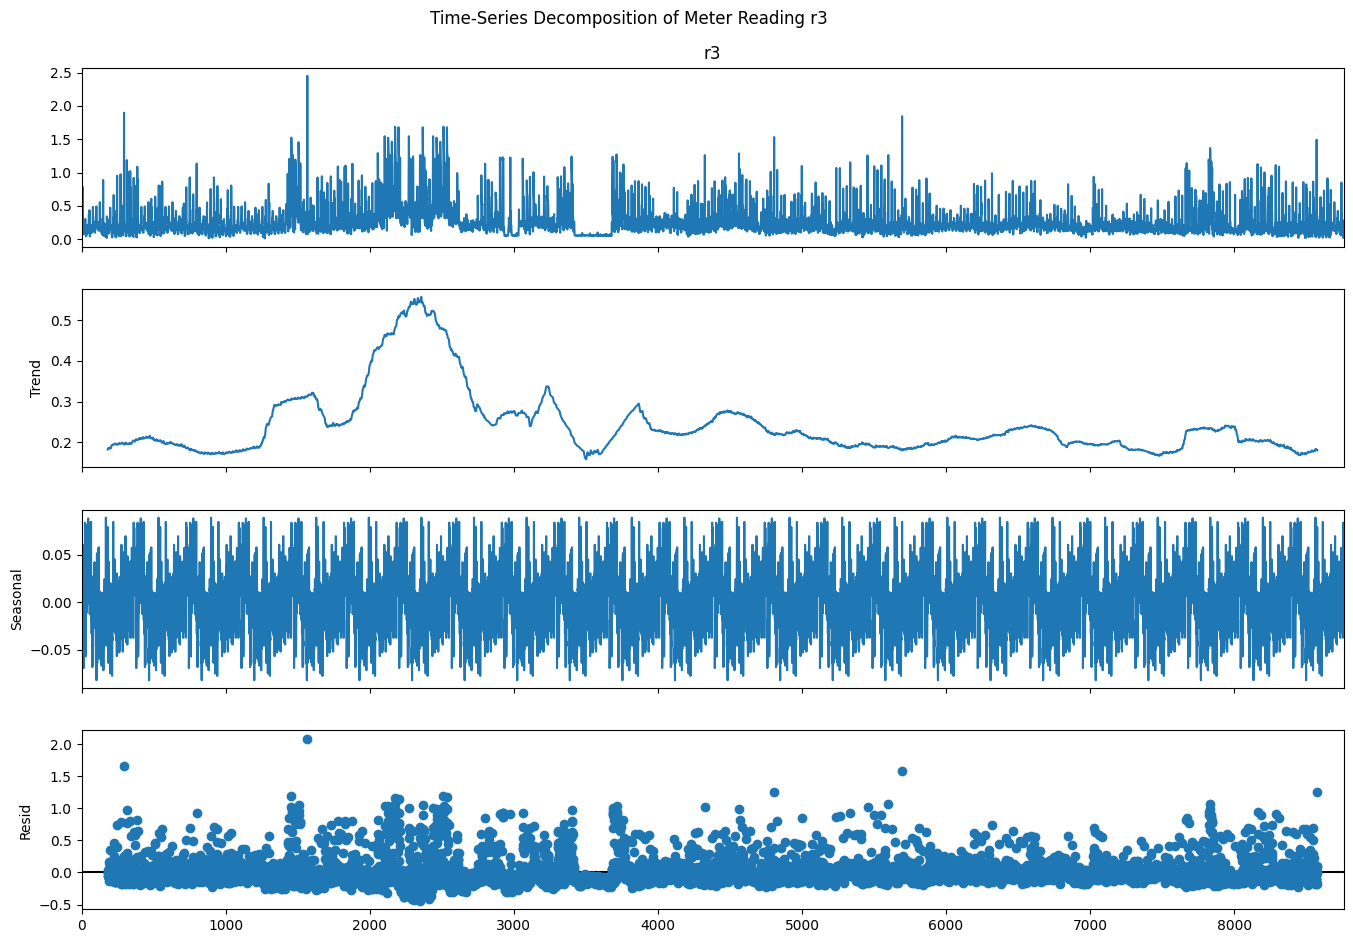

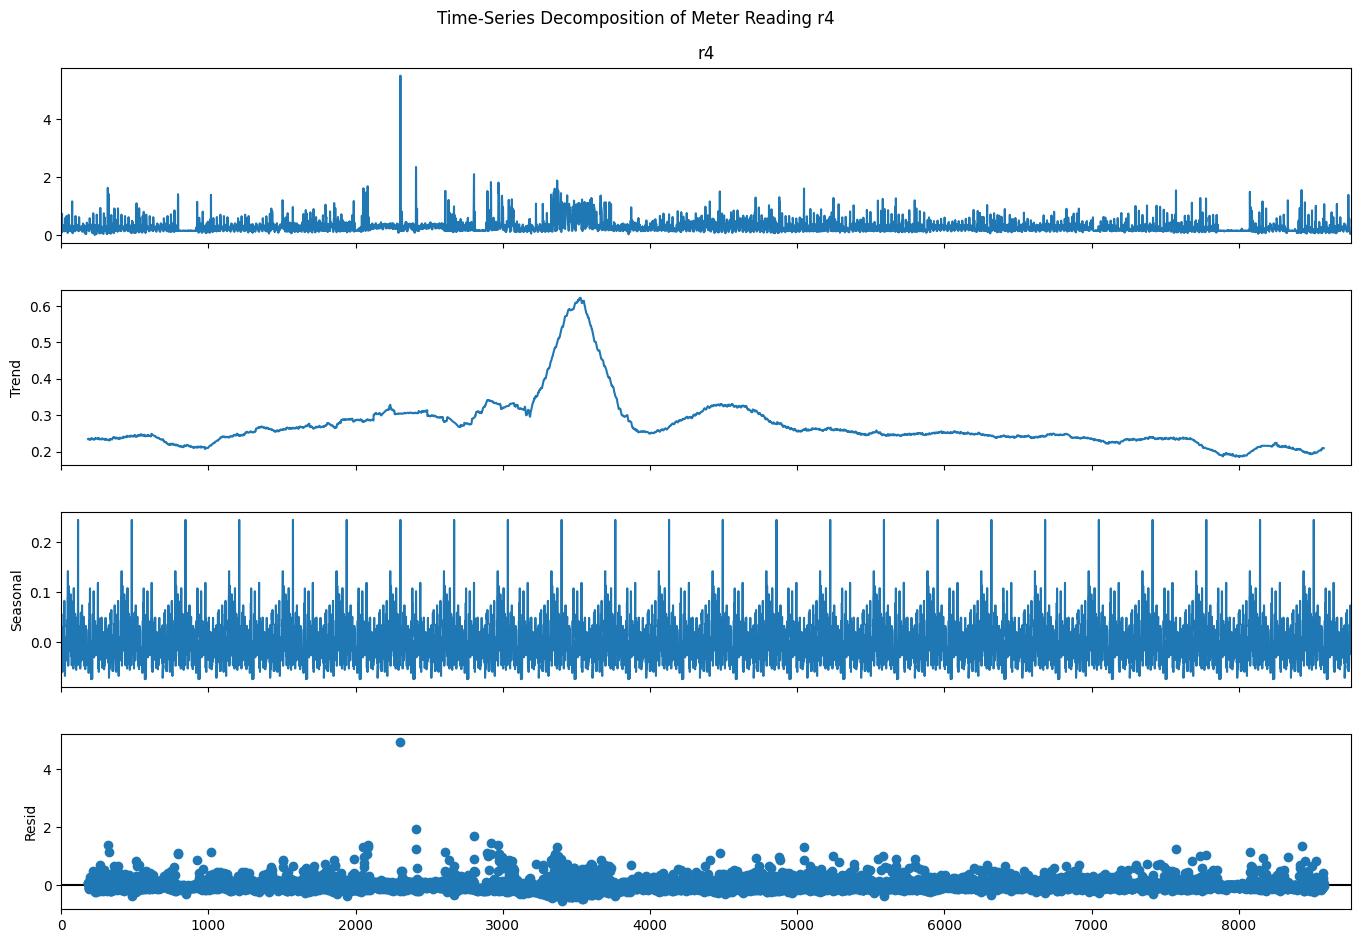

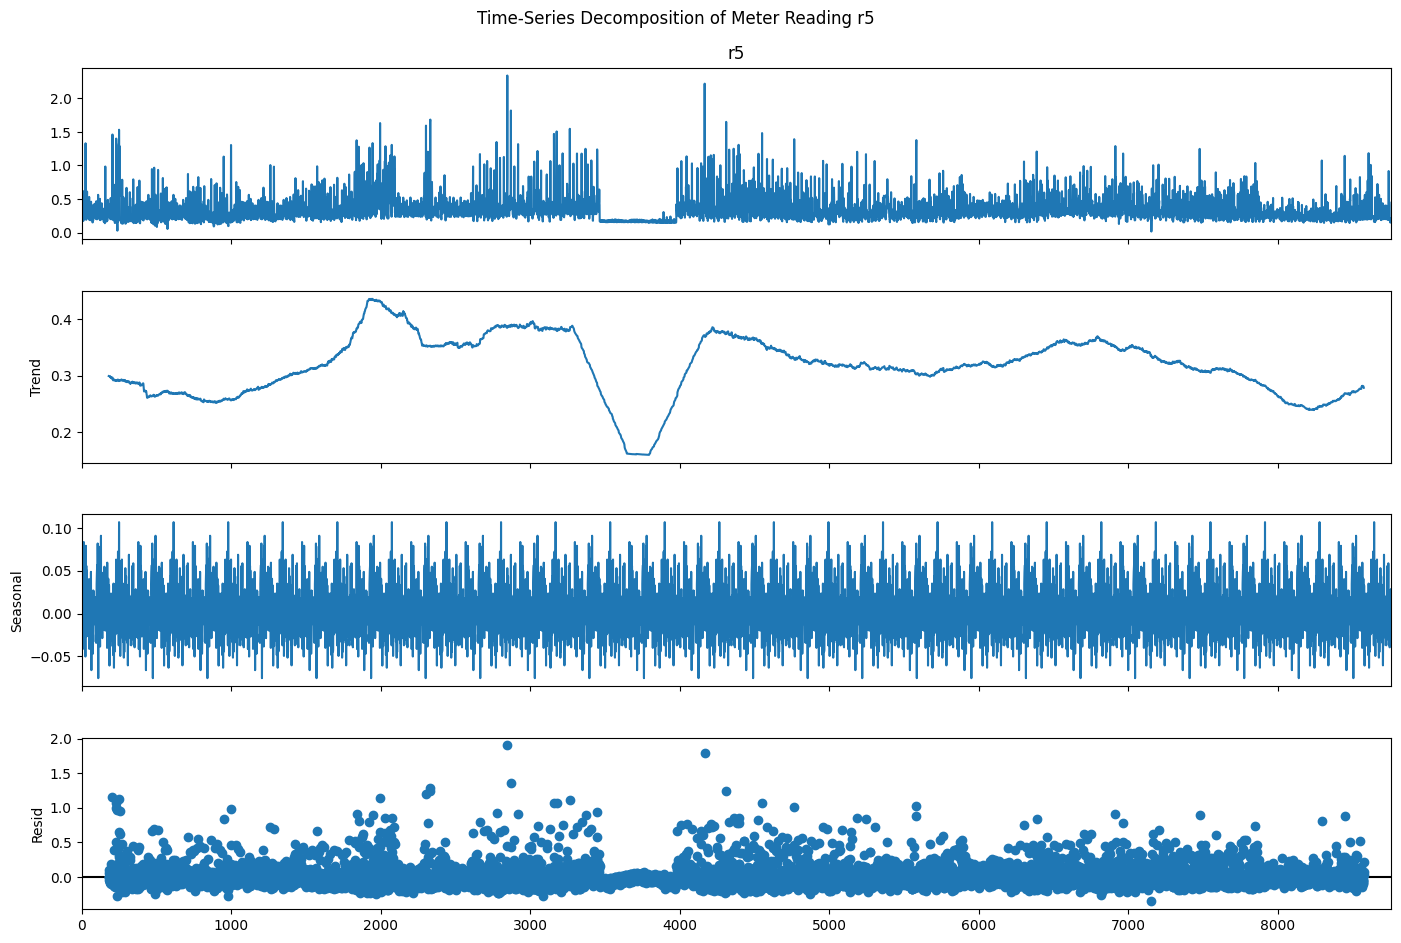

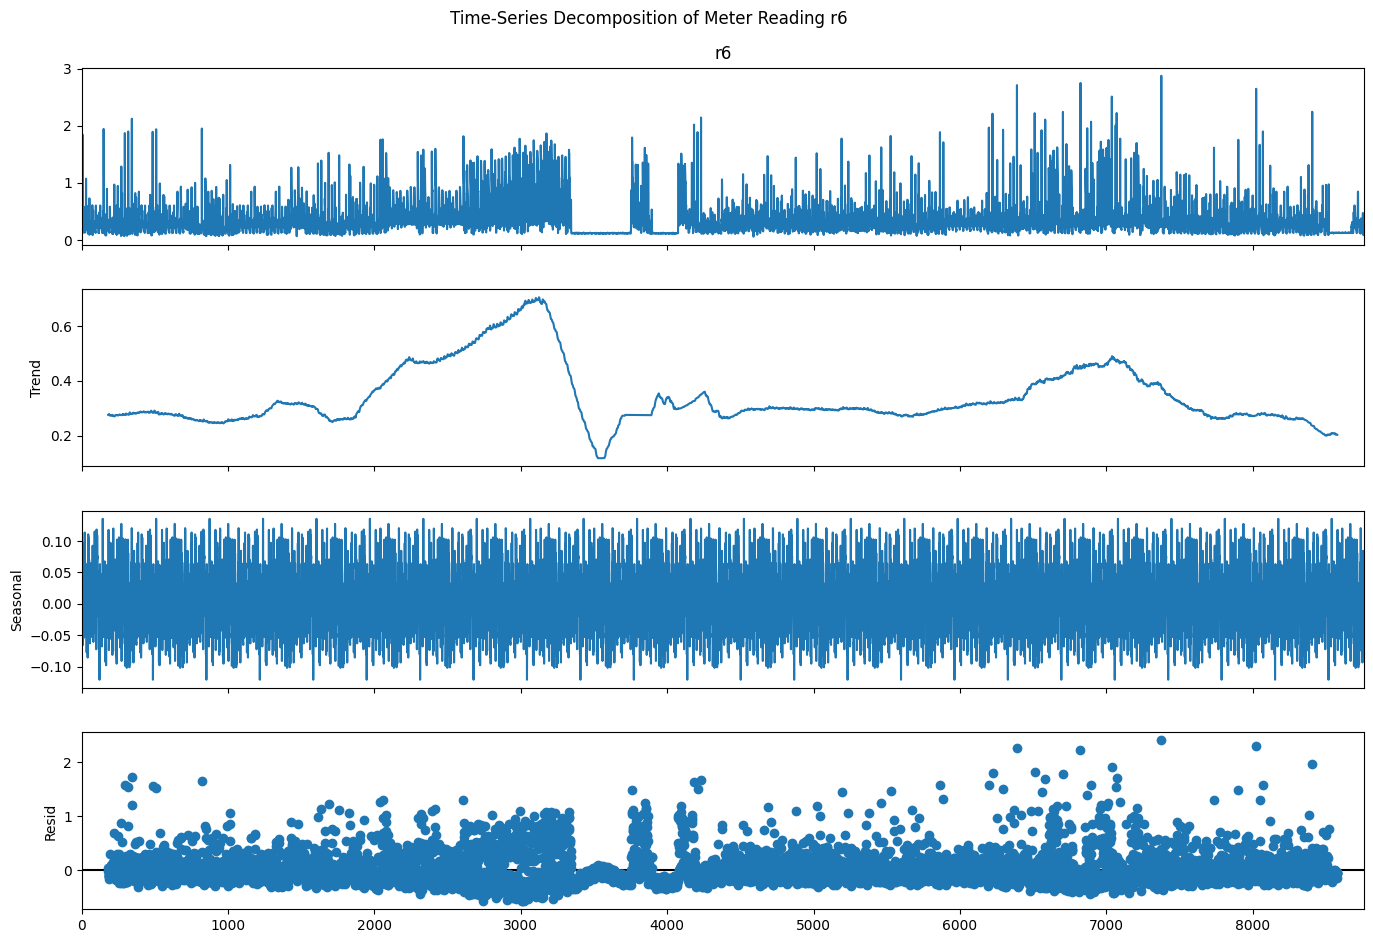

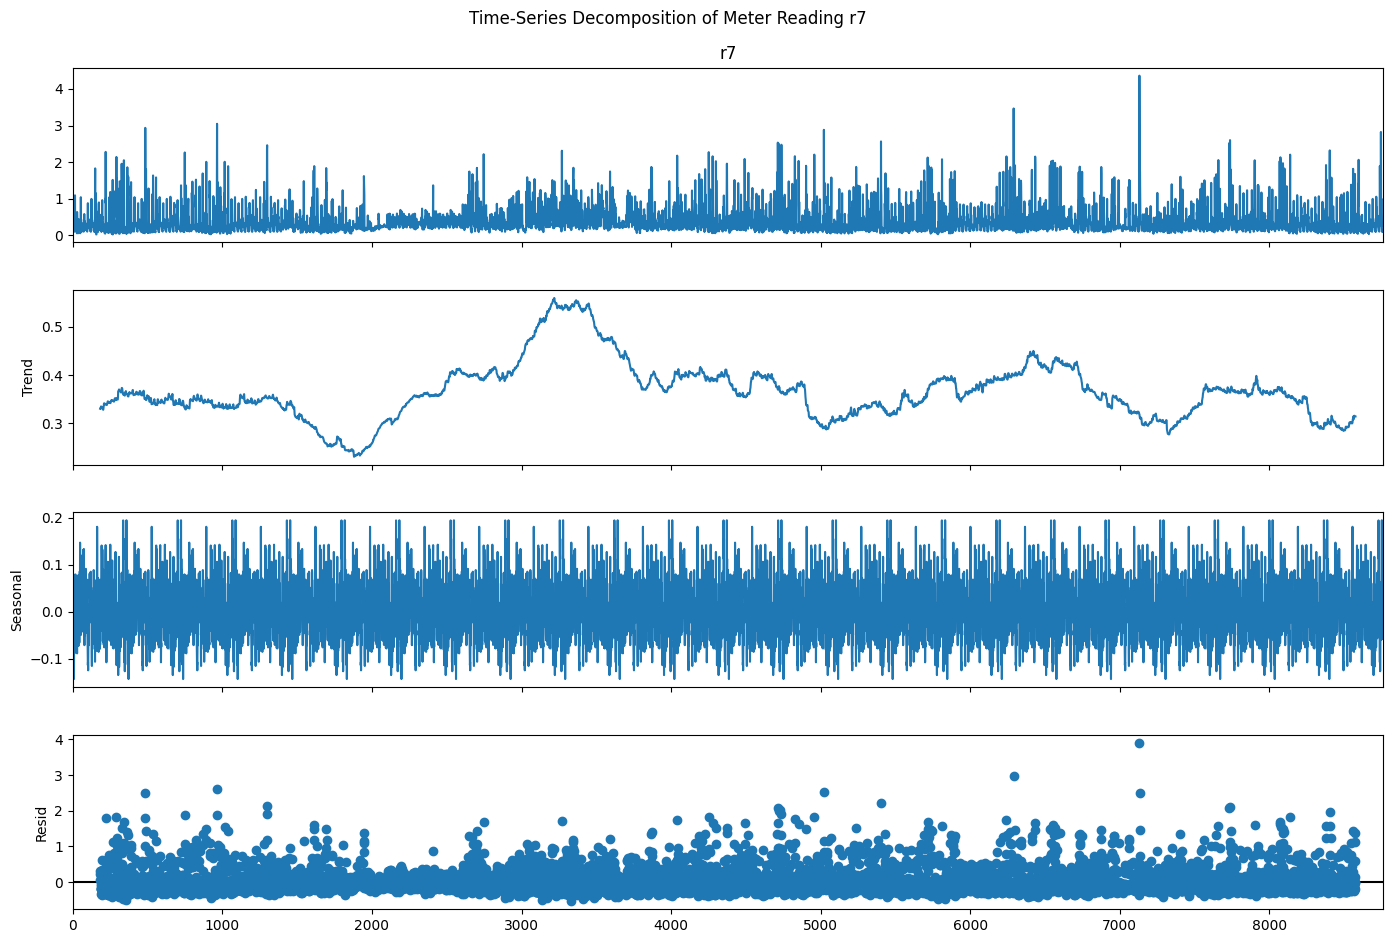

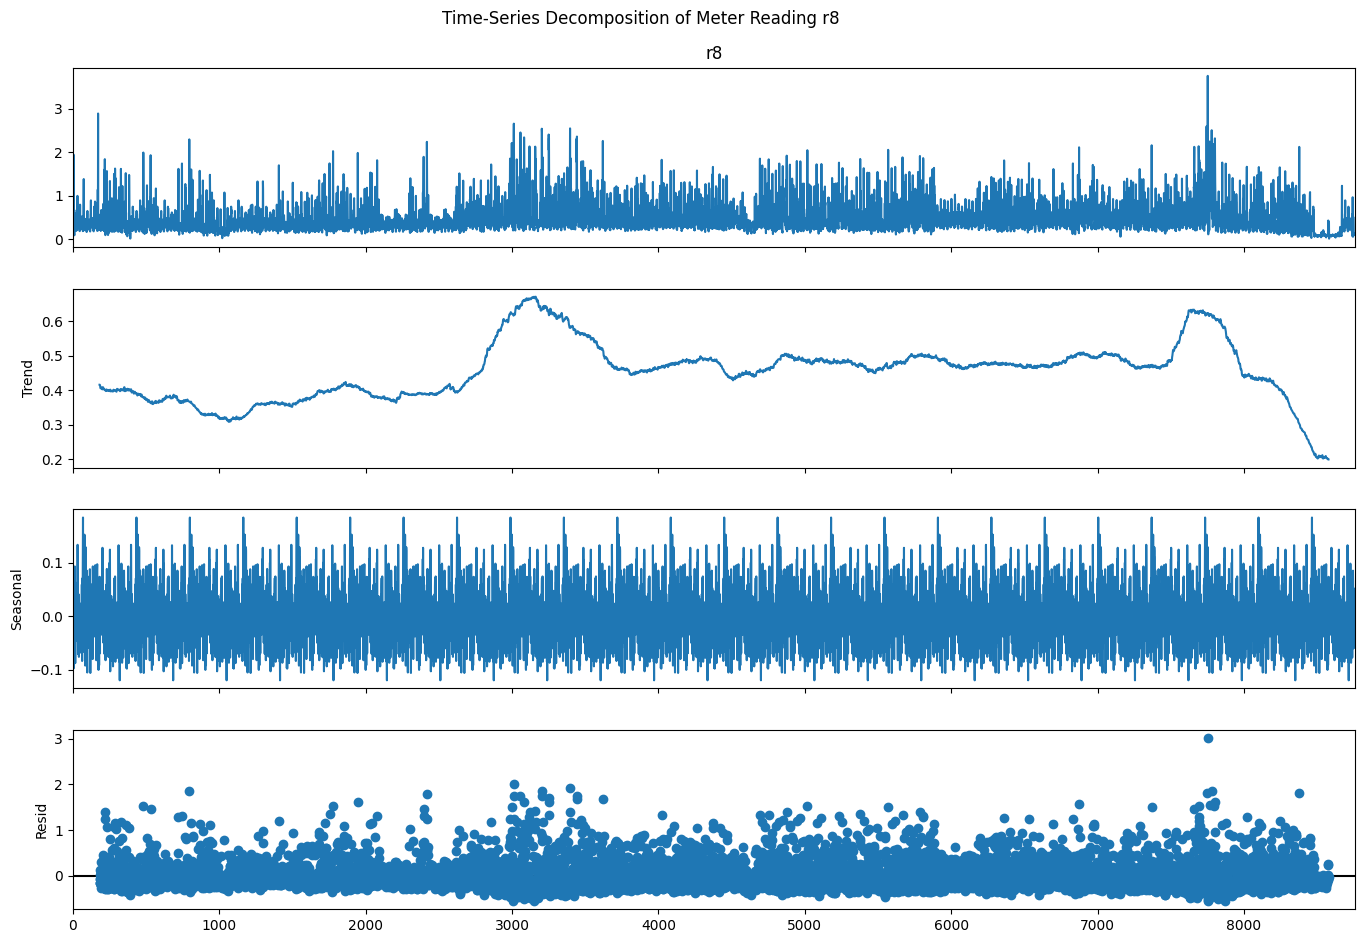

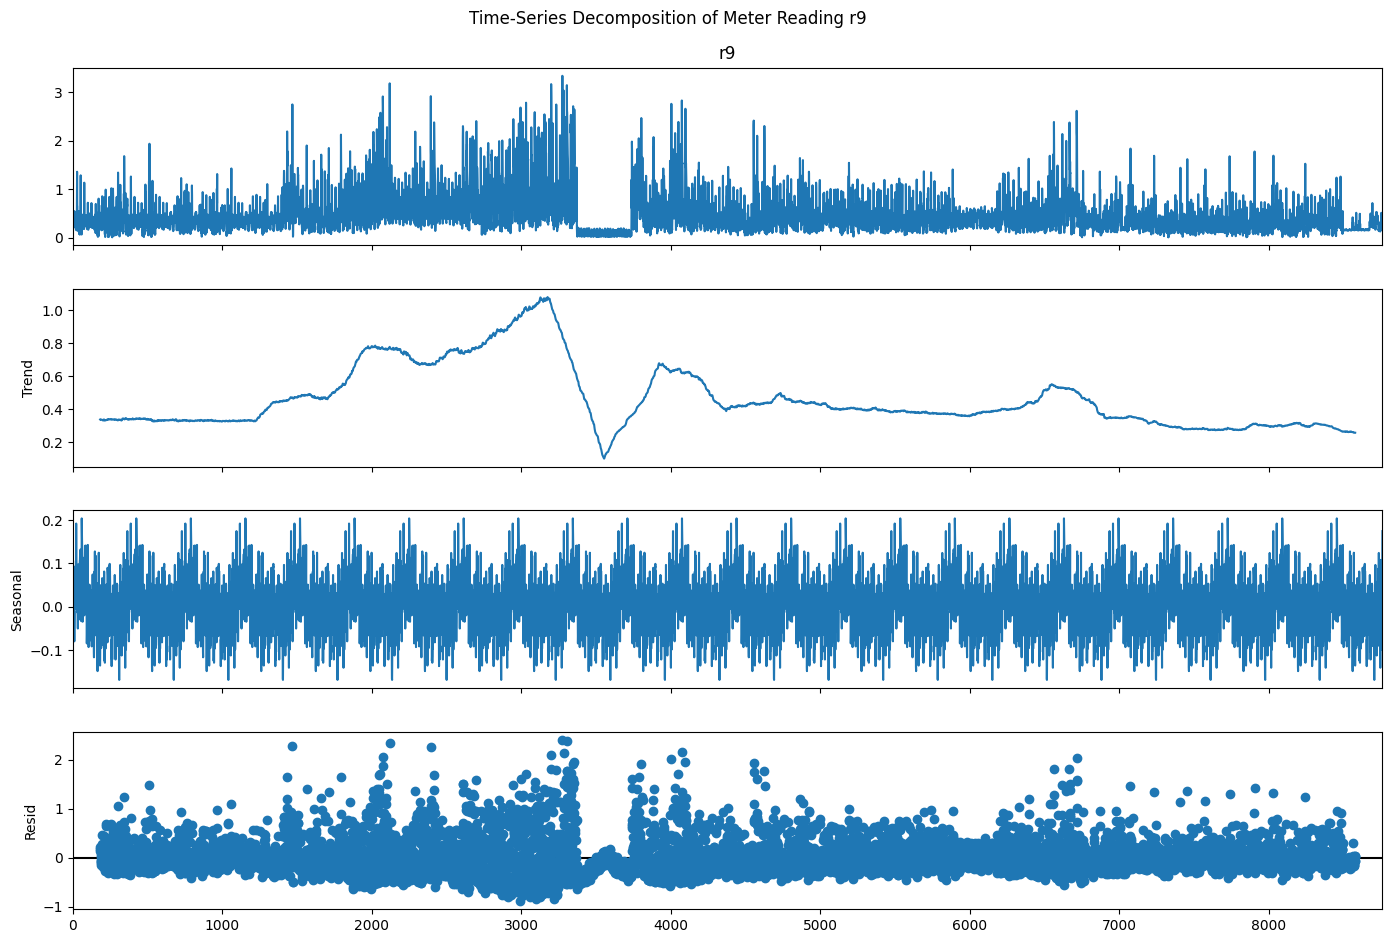

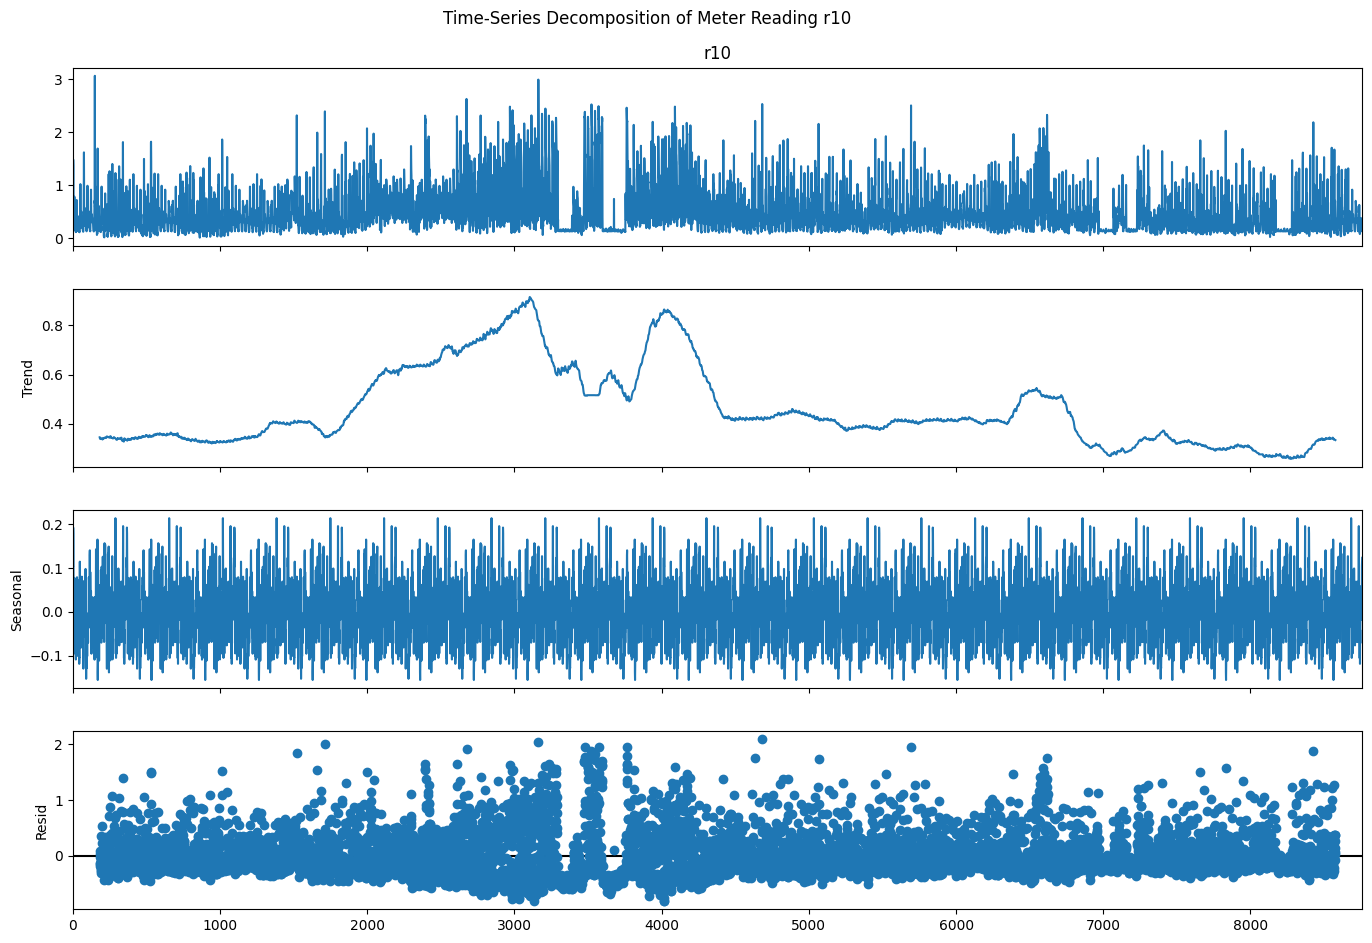

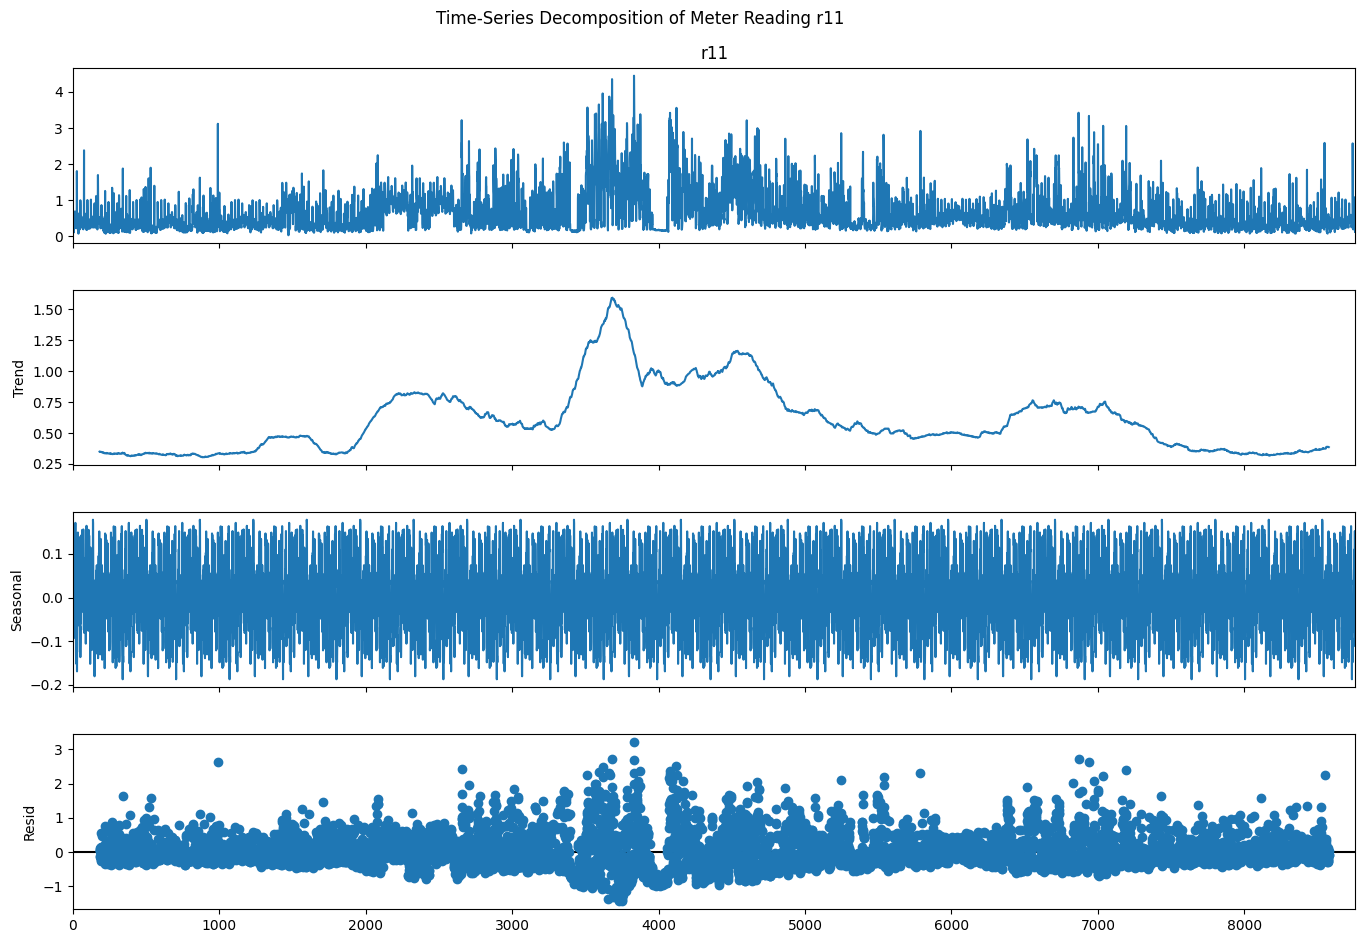

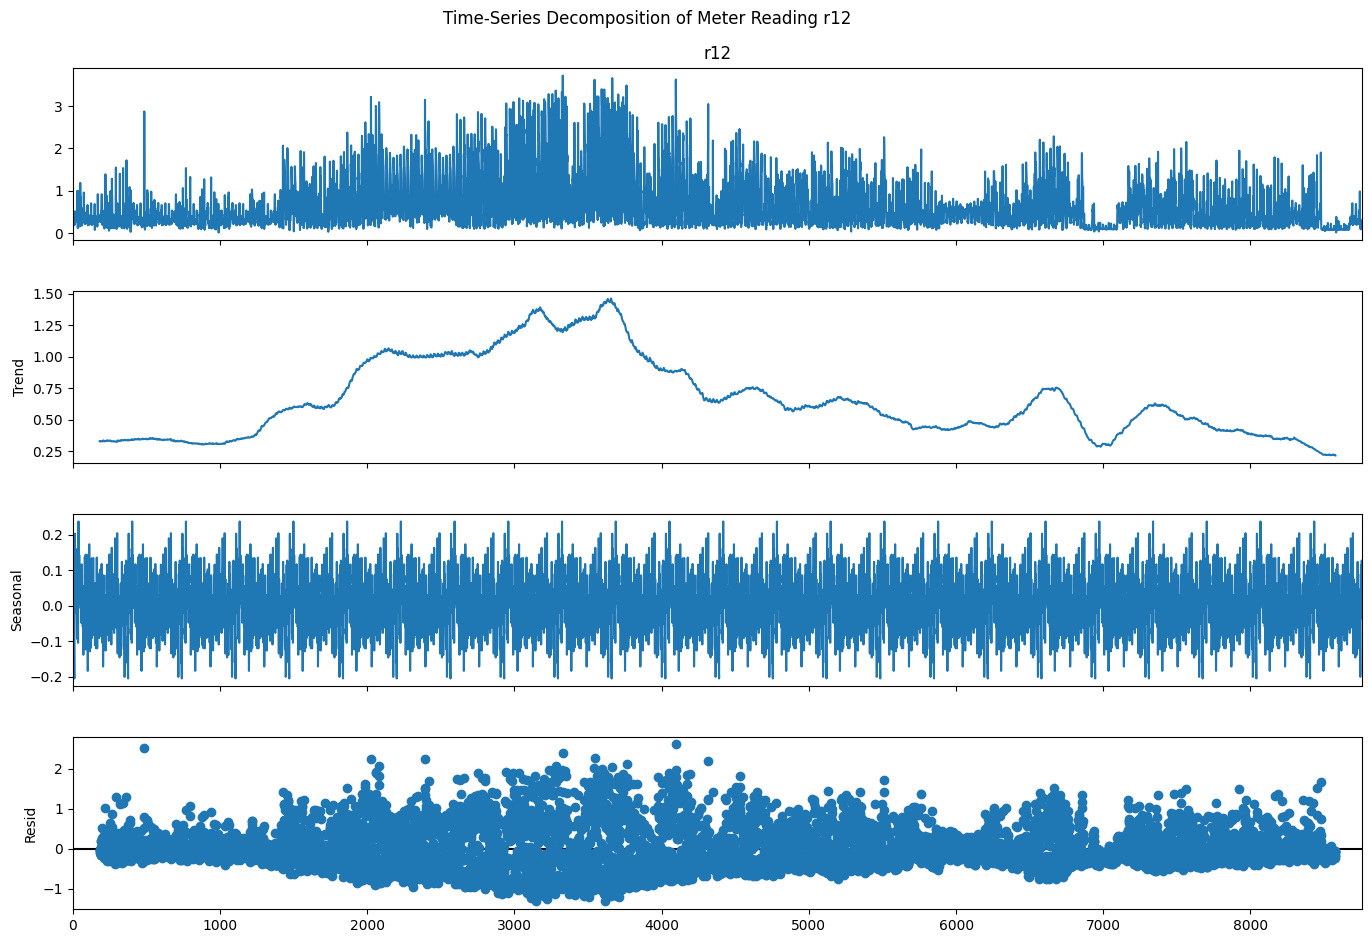

In [10]:
# Decomposing each meter reading time series
decompositions = {}
for meter in meter_readings.columns:
  decomposition = seasonal_decompose(meter_readings[meter], model='additive', period=365)
  decompositions[meter] = decomposition

for meter, decomposition in decompositions.items():
  fig = decomposition.plot()
  fig.set_size_inches(15, 10)
  plt.suptitle(f'Time-Series Decomposition of Meter Reading {meter}')
  plt.show()

Most of the meters show a spike in the trend component around the summer months (March-June) which could mean increased energy consumption.

The seasonal component doesn't tell us much. Since the frequency of the time series decomposition has been set to 365, it seems to imply the "seasonality" in daily energy consumption.

Residuals have a large degree of randomness. But most of the meters show increases around the summer months which could mean increased energy consumption.